# Calculo analítico para estados estacionarios 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
from sympy import init_printing
init_printing() 

In [5]:
init_printing()
c = Symbol('c', real=True)  # positive constant, greater than 1 implies cooperativity, less than 1 anti-cooperativity
a_Gli = Symbol('a_Gli', real=True)   # transcriptional activation intensity for Gli
a_Gli3 = Symbol('a_Gli3', real=True)   # transcriptional activation intensity for Gli
r_Gli3R = Symbol('r_Gli3R', real=True)   # transcriptional repression intensity for Gli
k_Gli = Symbol('k_Gli', real=True)   # dissociation constant of activators for gene enhancers
k_Gli3 = Symbol('k_Gli3', real=True)   # dissociation constant of activators for gene enhancers
k_Gli3R = Symbol('k_Gli3R', real=True)   # dissociation constant of repressors for gene enhancers
k_RNAP = Symbol('k_RNAP', real=True)   # RNA polymerase binding affinity
RNAP = Symbol('RNAP', real=True)   # RNA polymerase concentration
c_b = Symbol('c_b', real=True)   # BEWARE constant

# from Lai-Schaffer classic model

Shh = Symbol('Shh', real=True)   # Shh quantity [0,30]
k_shh = Symbol('k_shh', real=True)   # dissociation constant shh-ptc bindings [0.58,2.0]
k_Ptc = Symbol('k_ptc', real=True)   # half maximal concentration of ptc which inhibits smo signlaing
k_deg = Symbol('k_deg', real=True)   # degradation constant for all Gli related proteins
k_g3rc = Symbol('k_g3rc', real=True)   # rate constant for the conversion to signal strengh
r_g3b = Symbol('r_g3b', real=True)   # basal rate of Gli3 synthesis
K_g3rc = Symbol('K_g3rc', real=True)   # sensitivity constant of the conversion to signal strengh
k_deg_p = Symbol('k_deg_p', real=True)  # Degradation rate constant for Ptc [0.045,0.071]
 
Gli = Symbol('Gli', real=True)
Gli3 = Symbol('Gli3', real=True)
Gli3R = Symbol('Gli3R', real=True)
Ptc = Symbol('Ptc', real=True)
F_reg = Symbol('F_reg', real=True)
#---------
v_max = Symbol('v_max', real=True)
r_bas = Symbol('r_bas', real=True)
v_maxp = Symbol('v_maxp', real=True)
r_basp = Symbol('r_basp', real=True)
r = Symbol('r', real=True)
e = Symbol('e', real=True)
K1 = Symbol('K1', real=True)
K2 = Symbol('K2', real=True)
k_cc = Symbol('k_cc', real=True)

In [6]:
Ptc = k_cc*Gli
Ptc

In [19]:
Signal = Symbol('Signal', real=True)

In [20]:
Gli3 = (r_g3b/(k_cc*Gli))/((k_g3rc)/(K_g3rc+Signal)+k_deg)
expand(Gli3)

KeyboardInterrupt: 

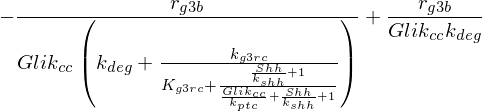

In [10]:
Gli3R=(r_g3b)/(k_deg*Ptc)-Gli3
Gli3R

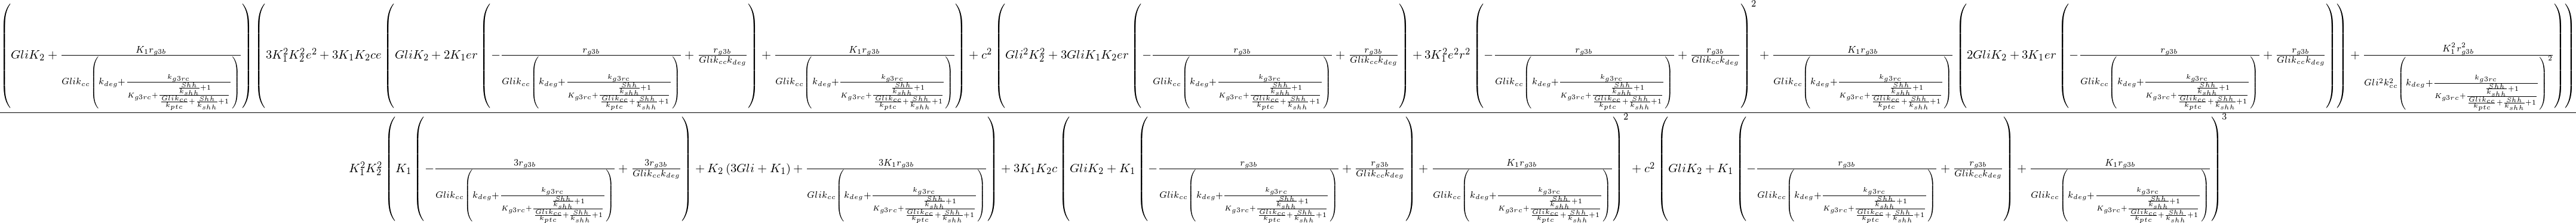

In [11]:
Promoter=((Gli3*K1+Gli*K2)*(3*e**2*K1**2*K2**2+3*c*e*K1*K2*(Gli3*K1+Gli*K2+2*e*Gli3R*K1*r)+c**2*(Gli3**2*K1**2+Gli**2*K2**2+3*e*Gli*Gli3R*K1*K2*r + 3*e**2*Gli3R**2*K1**2*r**2 + Gli3*K1*(2*Gli*K2 + 3*e*Gli3R*K1*r))))/(3*c*K1*K2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**2 + c**2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**3 +K1**2*K2**2*(3*Gli3*K1 + 3*Gli3R*K1 + (3*Gli + K1)*K2))
Promoter

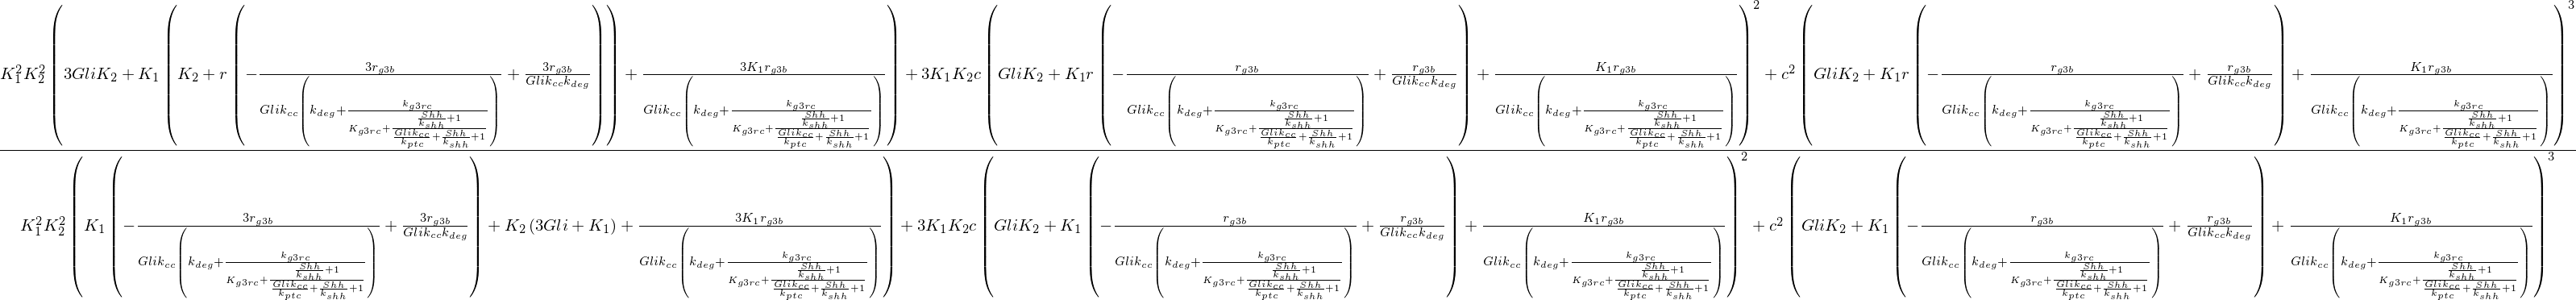

In [12]:
Basal=(3*c*K1*K2*(Gli3*K1+ Gli*K2 + Gli3R*K1*r)**2 + c**2*(Gli3*K1 + Gli*K2 + Gli3R*K1*r)**3 + K1**2*K2**2*(3*Gli3*K1 + 3*Gli*K2 + K1*(K2+ 3*Gli3R*r)))/ (3*c*K1*K2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**2 + c**2*(Gli3*K1 + Gli3R*K1 + Gli*K2)**3 + K1**2*K2**2*(3*Gli3*K1 + 3*Gli3R*K1 + (3*Gli +K1)*K2))
Basal


In [15]:
Gli=v_max/k_deg*(Promoter+(1/100)*Basal)
print(Gli)

v_max*((Gli*K2 + K1*r_g3b/(Gli*k_cc*(k_deg + k_g3rc/(K_g3rc + (Shh/k_shh + 1)/(Gli*k_cc/k_ptc + Shh/k_shh + 1)))))*(3*K1**2*K2**2*e**2 + 3*K1*K2*c*e*(Gli*K2 + 2*K1*e*r*(-r_g3b/(Gli*k_cc*(k_deg + k_g3rc/(K_g3rc + (Shh/k_shh + 1)/(Gli*k_cc/k_ptc + Shh/k_shh + 1)))) + r_g3b/(Gli*k_cc*k_deg)) + K1*r_g3b/(Gli*k_cc*(k_deg + k_g3rc/(K_g3rc + (Shh/k_shh + 1)/(Gli*k_cc/k_ptc + Shh/k_shh + 1))))) + c**2*(Gli**2*K2**2 + 3*Gli*K1*K2*e*r*(-r_g3b/(Gli*k_cc*(k_deg + k_g3rc/(K_g3rc + (Shh/k_shh + 1)/(Gli*k_cc/k_ptc + Shh/k_shh + 1)))) + r_g3b/(Gli*k_cc*k_deg)) + 3*K1**2*e**2*r**2*(-r_g3b/(Gli*k_cc*(k_deg + k_g3rc/(K_g3rc + (Shh/k_shh + 1)/(Gli*k_cc/k_ptc + Shh/k_shh + 1)))) + r_g3b/(Gli*k_cc*k_deg))**2 + K1*r_g3b*(2*Gli*K2 + 3*K1*e*r*(-r_g3b/(Gli*k_cc*(k_deg + k_g3rc/(K_g3rc + (Shh/k_shh + 1)/(Gli*k_cc/k_ptc + Shh/k_shh + 1)))) + r_g3b/(Gli*k_cc*k_deg)))/(Gli*k_cc*(k_deg + k_g3rc/(K_g3rc + (Shh/k_shh + 1)/(Gli*k_cc/k_ptc + Shh/k_shh + 1)))) + K1**2*r_g3b**2/(Gli**2*k_cc**2*(k_deg + k_g3rc/(K_g3rc + (S